# SED Processing Testing V2
This is an extension of the previous notebook which tests the functions that have been developed for processing and creating composite SEDS
The ides is that these functions will be useable enough, and will be flexible enough to allow for resuseability with different SEDs and with different AGN models

In [2]:
# Import in all of the required libraries
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import pandas as pd
import os
from astLib import astSED
import astropy.io.fits as fits
from carf import * # custom module for functions relating to the project

# So that we can change the helper functions without reloading the kernel
%load_ext autoreload
%autoreload 2


In [3]:
# setup all the directories we are getting our data from 

# Skirtor models
skirtor_folderpath = os.path.join('datasets', 'Templates', 'Skirtor')

# Swire templates
swire_folderpath = os.path.join('datasets', 'Templates', 'SWIRE')

# Brown templates
brown_folderpath = os.path.join('datasets', 'Templates', 'Brown', '2014','Rest')

# Filters
pb_U_path = os.path.join('datasets', 'Filters', 'Generic_Johnson.U.dat')
pb_V_path = os.path.join('datasets', 'Filters', 'Generic_Johnson.V.dat')
pb_J_path = os.path.join('datasets', 'Filters', '2MASS_2MASS.J.dat')

In [4]:
# In addition also use astSED to create filters
pb_U = astSED.Passband(pb_U_path, normalise=False)
pb_V = astSED.Passband(pb_V_path, normalise=False)
pb_J = astSED.Passband(pb_J_path, normalise=False)

# SWIRE + Skirtor Composite SEDs
This part of the document aims to test the combining proccess of the Skirtor AGN models, with the SWIRE templates. These templates have a shortened wavelength range so the functionality in the helper package should make sure these are both compatible and allow for composite seds to be made.


In [5]:
# Begin by attempting to create a composite of just 1 model
# For this we will define a type 1 agn model using the appropriate Skirtor parameters
# Begin by importing the first AGN model we would like to use
# 1. Type 1 AGN
tau = SKIRTOR_PARAMS['tau'][3]
p = SKIRTOR_PARAMS['p'][0]
q = SKIRTOR_PARAMS['q'][0]
oa = SKIRTOR_PARAMS['oa'][4]
rr = SKIRTOR_PARAMS['rr'][2]
i = SKIRTOR_PARAMS['i'][0]

agn_model = read_skirtor_model(skirtor_folderpath, tau, p, q, oa, rr, i)
wl_agn = agn_model['lambda (Angstroms)']
fl_agn = agn_model['Total Flux (erg/s/cm^2/Angstrom)']


In [6]:
agn_model

,lambda (Angstroms),Total Flux (erg/s/cm^2/Angstrom),Direct AGN Flux (erg/s/cm^2/Angstrom),Scattered AGN Flux (erg/s/cm^2/Angstrom),Total Dust Emission Flux (erg/s/cm^2/Angstrom),Dust Emission Scattered Flux(erg/s/cm^2/Angstrom),Transparent Flux(erg/s/cm^2/Angstrom)
0,1.000000e+01,1.073359e-06,1.073356e-06,2.313348e-12,0.000000e+00,0.0,1.073356e-06
1,1.148154e+01,1.103431e-06,1.103428e-06,3.123697e-12,0.000000e+00,0.0,1.103428e-06
2,1.318257e+01,1.134346e-06,1.134342e-06,4.200836e-12,0.000000e+00,0.0,1.134342e-06
3,1.513561e+01,1.166127e-06,1.166122e-06,5.637822e-12,0.000000e+00,0.0,1.166122e-06
4,1.737801e+01,1.198801e-06,1.198792e-06,8.761848e-12,0.000000e+00,0.0,1.198792e-06
...,...,...,...,...,...,...,...
127,5.754399e+06,2.272355e-16,2.742642e-18,0.000000e+00,2.244929e-16,0.0,2.742642e-18
128,6.606934e+06,1.013694e-16,1.578226e-18,0.000000e+00,9.979119e-17,0.0,1.578226e-18
129,7.585776e+06,4.517697e-17,9.081741e-19,0.000000e+00,4.426880e-17,0.0,9.081741e-19
130,8.709636e+06,2.012260e-17,5.225996e-19,0.000000e+00,1.960000e-17,0.0,5.225996e-19


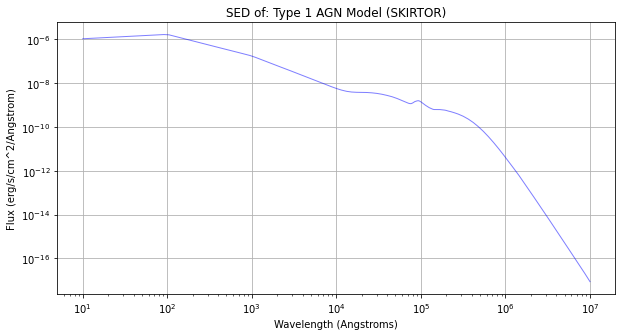

In [7]:

# plot the agn model
plot_galaxy_sed(wl_agn, fl_agn, "Type 1 AGN Model", "SKIRTOR")

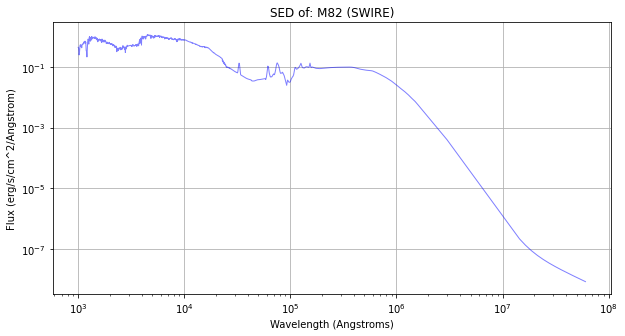

In [8]:
# Similarly we can plot a single swire template, we will use M82
m82_template, objname = read_swire_template(swire_folderpath, 'M82')
m82_template


wl_m82 = m82_template['lambda (Angstroms)']
fl_m82 = m82_template['Total Flux (erg/s/cm^2/Angstrom)']

# Plot the SED of M82
plot_galaxy_sed(wl_m82, fl_m82, 'M82', 'SWIRE')

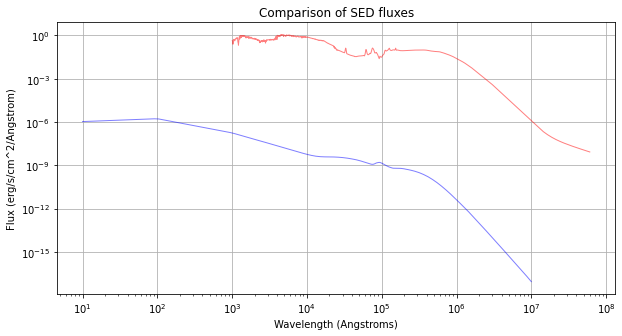

In [9]:
plt.figure(figsize=(10, 5))
plt.loglog(wl_m82, fl_m82, color='red', linewidth=1, linestyle='-', alpha=0.5)
plt.loglog(wl_agn, fl_agn, color='blue', linewidth=1, linestyle='-', alpha=0.5)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (erg/s/cm^2/Angstrom)')
plt.title('Comparison of SED fluxes')
plt.grid()
plt.show()

From the graph above it is obvious that we can se that both of these SEDs don't exactly align in a way that will make sense or work for us. To rectify this we need to make sure that both of these SEDs exsist over the same wavelength range (are interpolated over a set of combined wavelengths, and are also within the same range of values. We see that the AGN has a lot more values in the shorter wavelength range, so for this to work this information must be cut off. This may be a limitation in the SWIRE templates but further investigation is needed. Our step now is to correct the wavelength range for these two SEDS

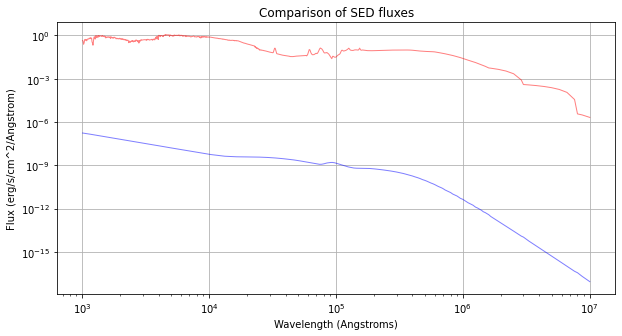

In [10]:
# We use our function two change the wavelenth range of the two SEDs, rectifying any missing wavelength values
m82_template, agn_model = adjust_wavelength_range(m82_template, agn_model)

# We can now attempt to replot these both on the same graph
wl_m82 = m82_template['lambda (Angstroms)']
fl_m82 = m82_template['Total Flux (erg/s/cm^2/Angstrom)']
wl_agn = agn_model['lambda (Angstroms)']
fl_agn = agn_model['Total Flux (erg/s/cm^2/Angstrom)']


# Plotting the adjusted SEDS
plt.figure(figsize=(10, 5))
plt.loglog(wl_m82, fl_m82, color='red', linewidth=1, linestyle='-', alpha=0.5)
plt.loglog(wl_agn, fl_agn, color='blue', linewidth=1, linestyle='-', alpha=0.5)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (erg/s/cm^2/Angstrom)')
plt.title('Comparison of SED fluxes')
plt.grid()
plt.show()

We can see that this has correctly put the SEDs into the same wavelength range and in addition to this have made both of the SEDs compareable in the wavelength range. Now we need to make sure that we get the fluxes to be comparable. We do this by integrating the fluxes across the wavelength range, and then perform a normalization based on the integral of the flux.

In [11]:
# We now perform integral normalization on both of the SEDS
agn_model = normalize_flux_integral(agn_model)
m82_template = normalize_flux_integral(m82_template)



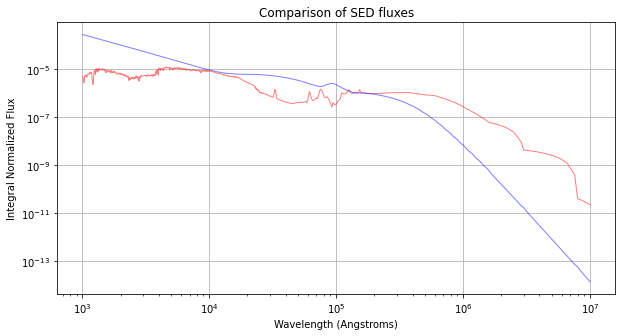

In [12]:
# We can attempt to plot these again 

# We can now attempt to replot these both on the same graph
wl_m82 = m82_template['lambda (Angstroms)']
fl_m82 = m82_template['integral normalized flux']
wl_agn = agn_model['lambda (Angstroms)']
fl_agn = agn_model['integral normalized flux']


# Plotting the adjusted SEDS
plt.figure(figsize=(10, 5))
plt.loglog(wl_m82, fl_m82, color='red', linewidth=1, linestyle='-', alpha=0.5)
plt.loglog(wl_agn, fl_agn, color='blue', linewidth=1, linestyle='-', alpha=0.5)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Integral Normalized Flux')
plt.title('Comparison of SED fluxes')
plt.grid()
plt.show()

In [13]:
# Now that we have a galaxy and a AGN which have integral normalized flux units, we can use our code to create composite agn+galaxies
# We begin with the example above

# Create an entirely new composite galaxy() with params alpha = 0.5, beta is default to 1, but set to (1-alpha for this)
# thus this is an galaxy composite created through sed addition: 50% AGN, 50% M82 (Starburst)
alpha = 0.5
agn_starburst_composite = create_gal_agn_composite_sed(agn_model, m82_template, alpha, (1-alpha))


agn_starburst_composite


,lambda (Angstroms),Total Flux (erg/s/cm^2/Angstrom)
0,1005.00,13.070191
1,1015.00,12.897069
2,1025.00,12.654373
3,1035.00,12.525509
4,1045.00,12.464833
...,...,...
1291,6606934.48,0.000057
1292,7585775.75,0.000018
1293,8000000.00,0.000002
1294,8709635.90,0.000002


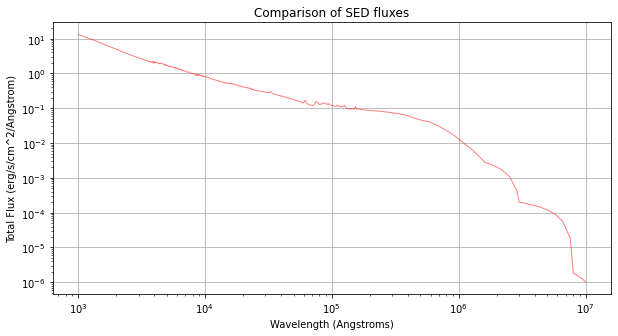

In [14]:
# We can now plot this composite
wl_comp = agn_starburst_composite['lambda (Angstroms)']
fl_comp = agn_starburst_composite['Total Flux (erg/s/cm^2/Angstrom)']


# Plotting the adjusted SEDS
plt.figure(figsize=(10, 5))
plt.loglog(wl_comp, fl_comp, color='red', linewidth=1, linestyle='-', alpha=0.5)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Total Flux (erg/s/cm^2/Angstrom)')
plt.title('Comparison of SED fluxes')
plt.grid()
plt.show()

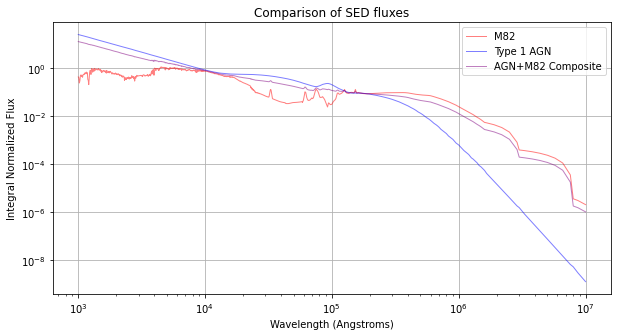

In [15]:
# Plotting this with it's component AGN bits
# We can now attempt to replot these both on the same graph
wl_m82 = m82_template['lambda (Angstroms)']
fl_m82 = m82_template['Total Flux (erg/s/cm^2/Angstrom)']
wl_agn = agn_model['lambda (Angstroms)']
fl_agn = agn_model['Total Flux (erg/s/cm^2/Angstrom)']


# Plotting the adjusted SEDS
plt.figure(figsize=(10, 5))
plt.loglog(wl_m82, fl_m82, color='red', linewidth=1, linestyle='-', alpha=0.5, label='M82')
plt.loglog(wl_agn, fl_agn, color='blue', linewidth=1, linestyle='-', alpha=0.5, label='Type 1 AGN')
plt.loglog(wl_comp, fl_comp, color='purple', linewidth=1, linestyle='-', alpha=0.5, label='AGN+M82 Composite')
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Integral Normalized Flux')
plt.title('Comparison of SED fluxes')
plt.grid()
plt.legend()
plt.show()

In [16]:
# Now we see exactly how these work we also note that this is not what we want
# We again try but instead we use a scaling factor derived from the galaxy to determine how to scale the AGN


# We attempt this using the parameters alpha = 0.5, beta = 1
# where the scaling is done internally in the function
alpha = 0.5
agn_starburst_composite_add = create_gal_agn_composite_sed(agn_model, m82_template, alpha)
agn_starburst_composite_add

,lambda (Angstroms),Total Flux (erg/s/cm^2/Angstrom)
0,1005.00,13.289631
1,1015.00,13.103019
2,1025.00,12.777259
3,1035.00,12.679163
4,1045.00,12.717443
...,...,...
1291,6606934.48,0.000113
1292,7585775.75,0.000036
1293,8000000.00,0.000004
1294,8709635.90,0.000003


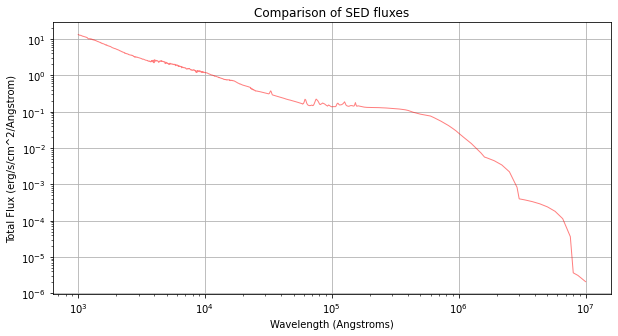

In [17]:
# We can now attempt to plot this
wl_comp = agn_starburst_composite_add['lambda (Angstroms)']
fl_comp = agn_starburst_composite_add['Total Flux (erg/s/cm^2/Angstrom)']

# Plotting the adjusted SEDS
plt.figure(figsize=(10, 5))
plt.loglog(wl_comp, fl_comp, color='red', linewidth=1, linestyle='-', alpha=0.5)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Total Flux (erg/s/cm^2/Angstrom)')
plt.title('Comparison of SED fluxes')
plt.grid()
plt.show()


In [18]:
# We attempt this method with multiple different values of alpha
alpha = np.linspace(0, 1, 6)

In [19]:
alpha

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

Creating composite with alpha = 0.0
Creating composite with alpha = 0.2
Creating composite with alpha = 0.4
Creating composite with alpha = 0.6000000000000001
Creating composite with alpha = 0.8
Creating composite with alpha = 1.0


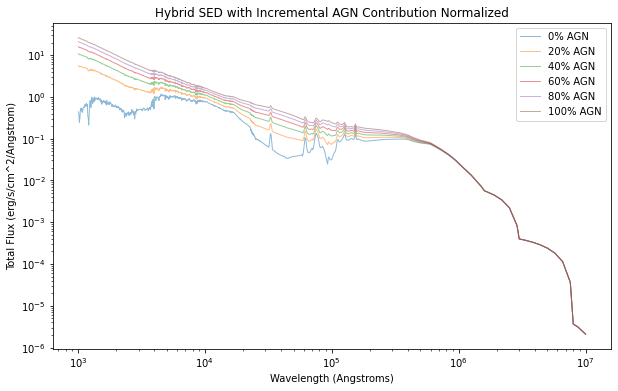

In [20]:
# Creating many composites
composites = []
for a in alpha:
    print(f'Creating composite with alpha = {a}')
    composite_galaxy = create_gal_agn_composite_sed(agn_model, m82_template, a, 1)
    composites.append(composite_galaxy)

# Plotting the adjusted SEDS
plt.figure(figsize=(10, 6))
for i, comp in enumerate(composites):
    wl_comp = comp['lambda (Angstroms)']
    fl_comp = comp['Total Flux (erg/s/cm^2/Angstrom)']
    plt.loglog(wl_comp, fl_comp, linewidth=1, linestyle='-', alpha=0.5, label=f'{round(alpha[i]*100)}% AGN')
plt.legend()
plt.title("Hybrid SED with Incremental AGN Contribution Normalized")
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Total Flux (erg/s/cm^2/Angstrom)')
plt.show()

In [21]:
# Now we have a list of composite SEDs we can attempt to convert these into restframe UVJ colours and ultimately plot these on a UVJ diagram
colour_list = []
uv_list = []
vj_list = []



for n in range(6):
    
    # use the wavelength and flux of the sed
    wl = composites[n].iloc[:, 0].values
    fl = composites[n].iloc[:, 1].values
    

    # create an SED object containing the SED of the galaxy
    # in addition to this use the relevant wavelength and flux
    sed = astSED.SED(wavelength=wl, flux=fl) # z = 0.0 as these are restframe SEDs

    # Using the astSED library calculate the UVJ colours using the U, V, and J passbands. 
    # We will use the AB magnitude system
    uv = astSED.SED.calcColour(sed, pb_U, pb_V, magType='AB')
    vj = astSED.SED.calcColour(sed, pb_V, pb_J, magType='AB')
    
    uv_list.append(uv)
    vj_list.append(vj)

In [22]:
alpha


array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

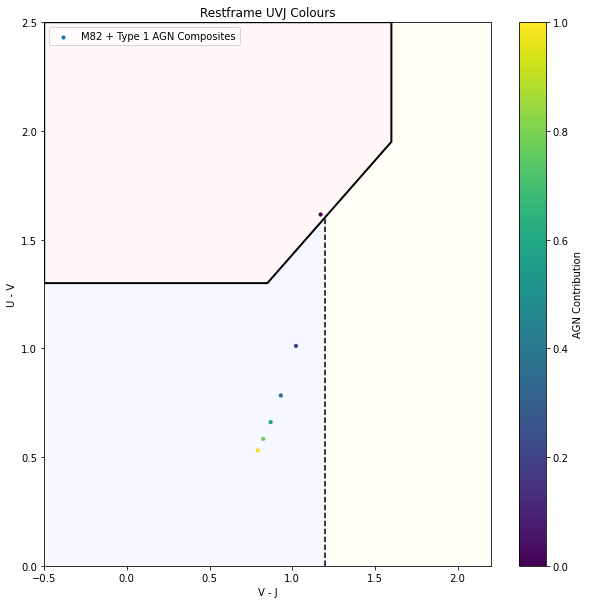

In [23]:
uv_colours = uv_list
vj_colours = vj_list
col = 'r'

plt.figure(figsize=(10, 10))
plt.scatter(vj_colours, uv_colours, c=alpha, s=10, label="M82 + Type 1 AGN Composites")
plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Restframe UVJ Colours")
plt.xlim([-0.5, 2.2])
plt.ylim([0, 2.5])

# Set colourbar label
plt.colorbar().set_label('AGN Contribution')


# Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)

plt.legend()
#Add text labels from name_list
#print(name_list[0])

plt.show()

In [24]:
# Again we can attempt to create a composite using a different galaxy templates.

# Now that we have a proof of concept that this works for one galaxy, we can generalise this and work with multiple galaxies
# Read in a list of swire tempaltes, and append them into a list
# Read in the subset of the swire templates


## Type 1 AGN + Swire Composites
This particular code will be used to create a set of Type 1 + SWIRE Composites

In [25]:
# To extend this we are now dealing with more than one galaxy so we need to make sure our code is flexible enough to be able to create
# useful composites that are correctly scaled. To do this we need to make sure every composite we generate is scaled accurately against a useful

# Follow a similar proccess as before

# Define the particular AGN Model we are exploring
# # 1. Type 1 AGN
tau = SKIRTOR_PARAMS['tau'][2]
p = SKIRTOR_PARAMS['p'][0]
q = SKIRTOR_PARAMS['q'][0]
oa = SKIRTOR_PARAMS['oa'][4]
rr = SKIRTOR_PARAMS['rr'][2]
i = SKIRTOR_PARAMS['i'][0]


# This is again, a new model
agn_model = read_skirtor_model(skirtor_folderpath, tau, p, q, oa, rr, i)

# Print the parameters used in the AGN model
print(f'Tau: {tau}, p: {p}, q: {q}, oa: {oa}, rr: {rr}, i: {i}')

# 2. Swire Templates
swire_templates = []
objname_list = []

# In this template set we have 3 ellipticals, 4 spirals, 2 star bursts, and a Seyfert 2 galaxy (which inherently has AGN contributions)
template_names = ['Ell2', 'Ell5', 'S0', 'Sb', 'Sc', 'M82', 'N6090', 'Sdm', 'Sey2']
for name in template_names:
    
    template, obj_name = read_swire_template(swire_folderpath, name)
    swire_templates.append(template)
    objname_list.append(obj_name)

# Make sure AGN are correctly scaled against the galaxy range   
# Have an original AGN model to adjust against 
type_1_agn = agn_model.copy()

type1agn_models = []


# When adjusting, we need to make sure we interpolate the data correctly at each point, 
# so for a specific AGN model this needs to be interpolated correctly against the relevant galaxy template
# essentially each AGN model will be specifically cut for it's template.
for i, template in enumerate(swire_templates):
    swire_templates[i], agn_model = adjust_wavelength_range(template, agn_model)   
    type1agn_models.append(agn_model)
    agn_model = type_1_agn.copy()


# Using the same alpha as before, we can create a composite of the AGN and the galaxy



Tau: 7, p: 0, q: 0, oa: 50, rr: 30, i: 0


In [26]:
agn_model

,lambda (Angstroms),Total Flux (erg/s/cm^2/Angstrom),Direct AGN Flux (erg/s/cm^2/Angstrom),Scattered AGN Flux (erg/s/cm^2/Angstrom),Total Dust Emission Flux (erg/s/cm^2/Angstrom),Dust Emission Scattered Flux(erg/s/cm^2/Angstrom),Transparent Flux(erg/s/cm^2/Angstrom)
0,1.000000e+01,1.073359e-06,1.073356e-06,2.379063e-12,0.000000e+00,0.0,1.073356e-06
1,1.148154e+01,1.103431e-06,1.103428e-06,3.158715e-12,0.000000e+00,0.0,1.103428e-06
2,1.318257e+01,1.134346e-06,1.134342e-06,4.082500e-12,0.000000e+00,0.0,1.134342e-06
3,1.513561e+01,1.166127e-06,1.166122e-06,5.661308e-12,0.000000e+00,0.0,1.166122e-06
4,1.737801e+01,1.198801e-06,1.198792e-06,8.608993e-12,0.000000e+00,0.0,1.198792e-06
...,...,...,...,...,...,...,...
127,5.754399e+06,1.764343e-16,2.742642e-18,0.000000e+00,1.736916e-16,0.0,2.742642e-18
128,6.606934e+06,7.875017e-17,1.578226e-18,0.000000e+00,7.717195e-17,0.0,1.578226e-18
129,7.585776e+06,3.513045e-17,9.081741e-19,0.000000e+00,3.422227e-17,0.0,9.081741e-19
130,8.709636e+06,1.566978e-17,5.225996e-19,0.000000e+00,1.514718e-17,0.0,5.225996e-19


In [27]:
swire_templates[0]

,lambda (Angstroms),Total Flux (erg/s/cm^2/Angstrom)
0,1005.00,3.466470e-03
1,1015.00,3.500670e-03
2,1025.00,3.090270e-03
3,1035.00,3.261270e-03
4,1045.00,3.688780e-03
...,...,...
1223,6606934.48,5.386187e-08
1224,7585775.75,1.689505e-08
1225,8000000.00,1.251500e-09
1226,8709635.90,1.053331e-09


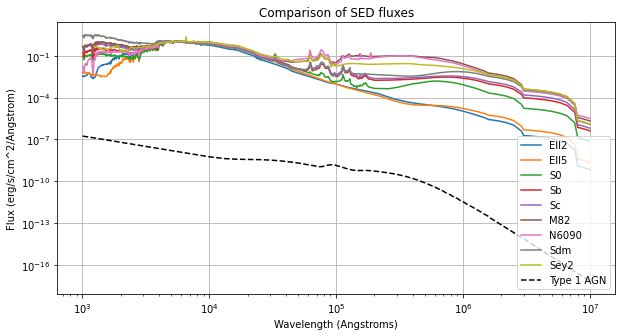

In [28]:
# We can plot the fluxes all on one graph to see if they are within the same wavelength range

# Use this as a comparison, but in actuality each AGN model will be adjusted to the specific galaxy template
wl_agn = type1agn_models[0]['lambda (Angstroms)']
fl_agn = type1agn_models[0]['Total Flux (erg/s/cm^2/Angstrom)']


plt.figure(figsize=(10, 5))
for i, template in enumerate(swire_templates):
    wl = template['lambda (Angstroms)']
    fl = template['Total Flux (erg/s/cm^2/Angstrom)']
    plt.loglog(wl, fl, label=objname_list[i])
plt.loglog(wl_agn, fl_agn, label='Type 1 AGN', color='black', linestyle='--')
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (erg/s/cm^2/Angstrom)')
plt.title('Comparison of SED fluxes')
plt.grid()
plt.legend()
plt.show()


# This makes sense for this range of SEDs, we can now use our code to create a composite of these SEDs, creating the code to work
# with only 1 galaxy, then generalising it to 2




In [29]:
# Before looping through the galaxies we can test the code with just one galaxy
# We attempt this method with multiple different values of alpha, as defined before
alpha = np.linspace(0, 1, 12)

n = 8

# Creating many composites 
composites = []
for a in alpha:
    print(f'Creating composite with alpha = {a}')
    composite_galaxy = create_gal_agn_composite_sed(type1agn_models[n], swire_templates[n], a, 1)
    composites.append(composite_galaxy)


Creating composite with alpha = 0.0
Creating composite with alpha = 0.09090909090909091
Creating composite with alpha = 0.18181818181818182
Creating composite with alpha = 0.2727272727272727
Creating composite with alpha = 0.36363636363636365
Creating composite with alpha = 0.4545454545454546
Creating composite with alpha = 0.5454545454545454
Creating composite with alpha = 0.6363636363636364
Creating composite with alpha = 0.7272727272727273
Creating composite with alpha = 0.8181818181818182
Creating composite with alpha = 0.9090909090909092
Creating composite with alpha = 1.0


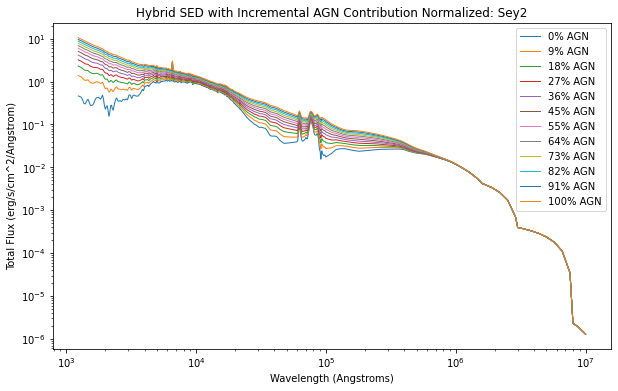

In [30]:

# Plotting the adjusted SEDS
plt.figure(figsize=(10, 6))
for i, comp in enumerate(composites):
    wl_comp = comp['lambda (Angstroms)']
    fl_comp = comp['Total Flux (erg/s/cm^2/Angstrom)']
    plt.loglog(wl_comp, fl_comp, linewidth=1, linestyle='-', label=f'{round(alpha[i]*100)}% AGN')
plt.legend()
plt.title("Hybrid SED with Incremental AGN Contribution Normalized: " + objname_list[n])
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Total Flux (erg/s/cm^2/Angstrom)')
plt.show()



In [31]:
# Now that we have a working composite set, we aim to do this for all templates, creating a list of composites, 
# with each of those composites also having values from 0 to 1 for alpha, defined earlier
spacing = 6
alpha = np.linspace(0, 1, spacing)
type1composites = []

# So for every swire template
for i, template in enumerate(swire_templates):
    print(f'Creating composite for {objname_list[i]}')
    agn_model = type1agn_models[i]
    type1composite_list = []
    for a in alpha:
        composite_galaxy = create_gal_agn_composite_sed(agn_model, template, a, 1)
        type1composite_list.append(composite_galaxy)
    type1composites.append(type1composite_list)
    
    

Creating composite for Ell2
Creating composite for Ell5
Creating composite for S0
Creating composite for Sb
Creating composite for Sc
Creating composite for M82
Creating composite for N6090
Creating composite for Sdm
Creating composite for Sey2


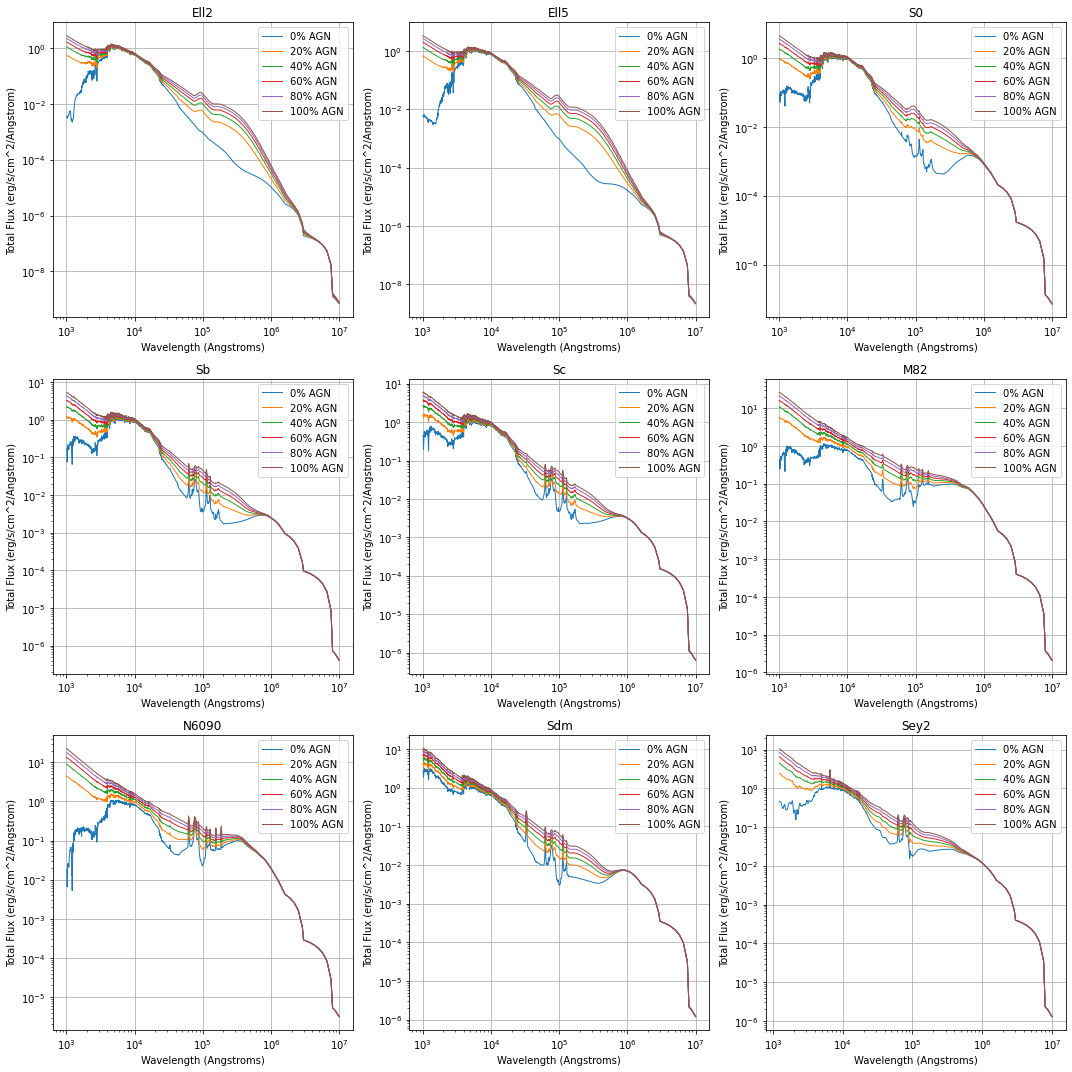

In [32]:
# We should have composites which work now. To check that this works, we can plot a 3x3 grid of the composites
# Plotting the composite SEDs 
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i+1)
    for j, comp in enumerate(type1composites[i]):
        wl_comp = comp['lambda (Angstroms)']
        fl_comp = comp['Total Flux (erg/s/cm^2/Angstrom)']
        plt.loglog(wl_comp, fl_comp, linewidth=1, linestyle='-', label=f'{round(alpha[j]*100)}% AGN')
    plt.legend()
    plt.title(objname_list[i])
    plt.xlabel('Wavelength (Angstroms)')
    plt.ylabel('Total Flux (erg/s/cm^2/Angstrom)')
    plt.grid()
    
plt.tight_layout()

# Save to outputs folder
plt.savefig('outputs/Type1AGNComposites.png', bbox_inches='tight', pad_inches=0.1, facecolor='white')

plt.show()



## Type 2 AGN + Swire Composites

In [33]:
# Define the particular AGN Model we are exploring
# # 1. Type 2 AGN
tau = SKIRTOR_PARAMS['tau'][2]
p = SKIRTOR_PARAMS['p'][0]
q = SKIRTOR_PARAMS['q'][0]
oa = SKIRTOR_PARAMS['oa'][4]
rr = SKIRTOR_PARAMS['rr'][2]
i = SKIRTOR_PARAMS['i'][9]


# This is again, a new model
agn_model = read_skirtor_model(skirtor_folderpath, tau, p, q, oa, rr, i)

# Print the parameters used in the AGN model
print(f'Tau: {tau}, p: {p}, q: {q}, oa: {oa}, rr: {rr}, i: {i}')

# 2. Swire Templates
swire_templates = []
objname_list = []

# In this template set we have 3 ellipticals, 4 spirals, 2 star bursts, and a Seyfert 2 galaxy (which inherently has AGN contributions)
template_names = ['Ell2', 'Ell5', 'S0', 'Sb', 'Sc', 'M82', 'N6090', 'Sdm', 'Sey2']
for name in template_names:
    
    template, obj_name = read_swire_template(swire_folderpath, name)
    swire_templates.append(template)
    objname_list.append(obj_name)

# Make sure AGN are correctly scaled against the galaxy range   
# Have an original AGN model to adjust against 
type_2_agn = agn_model.copy()

type2agn_models = []

# When adjusting, we need to make sure we interpolate the data correctly at each point, 
# so for a specific AGN model this needs to be interpolated correctly against the relevant galaxy template
# essentially each AGN model will be specifically cut for it's template.
for i, template in enumerate(swire_templates):
    swire_templates[i], agn_model = adjust_wavelength_range(template, agn_model)   
    type2agn_models.append(agn_model)
    agn_model = type_2_agn.copy()

Tau: 7, p: 0, q: 0, oa: 50, rr: 30, i: 90


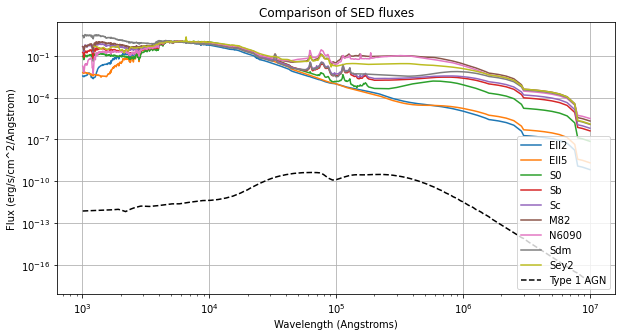

In [34]:
# We can plot the fluxes all on one graph to see if they are within the same wavelength range

# Use this as a comparison, but in actuality each AGN model will be adjusted to the specific galaxy template
wl_agn = type2agn_models[0]['lambda (Angstroms)']
fl_agn = type2agn_models[0]['Total Flux (erg/s/cm^2/Angstrom)']


plt.figure(figsize=(10, 5))
for i, template in enumerate(swire_templates):
    wl = template['lambda (Angstroms)']
    fl = template['Total Flux (erg/s/cm^2/Angstrom)']
    plt.loglog(wl, fl, label=objname_list[i])
plt.loglog(wl_agn, fl_agn, label='Type 1 AGN', color='black', linestyle='--')
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (erg/s/cm^2/Angstrom)')
plt.title('Comparison of SED fluxes')
plt.grid()
plt.legend()
plt.show()

In [35]:
# Creating my full set of composites
# Now that we have a working composite set, we aim to do this for all templates, creating a list of composites, 
# with each of those composites also having values from 0 to 1 for alpha, defined earlier
spacing = 6
alpha = np.linspace(0, 1, spacing)
type2composites = []

# So for every swire template
for i, template in enumerate(swire_templates):
    print(f'Creating composite for {objname_list[i]}')
    agn_model = type2agn_models[i]
    type2composite_list = []
    for a in alpha:
        composite_galaxy = create_gal_agn_composite_sed(agn_model, template, a, 1)
        type2composite_list.append(composite_galaxy)
    type2composites.append(type2composite_list)
    

Creating composite for Ell2
Creating composite for Ell5
Creating composite for S0
Creating composite for Sb
Creating composite for Sc
Creating composite for M82
Creating composite for N6090
Creating composite for Sdm
Creating composite for Sey2


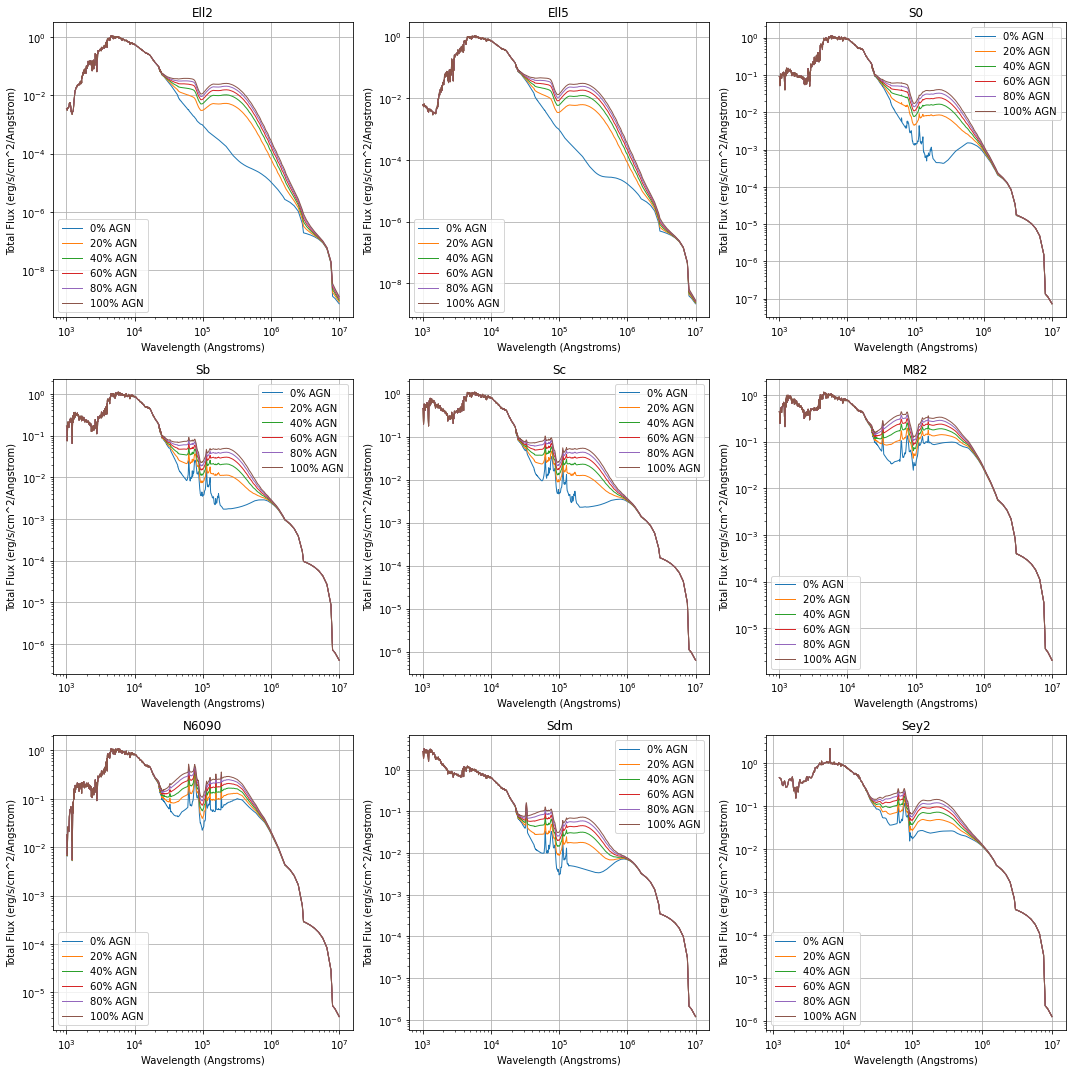

In [36]:
# Now we have our new set of composites we can plot these to see how they look
# Plotting the composite SEDs
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i+1)
    for j, comp in enumerate(type2composites[i]):
        wl_comp = comp['lambda (Angstroms)']
        fl_comp = comp['Total Flux (erg/s/cm^2/Angstrom)']
        plt.loglog(wl_comp, fl_comp, linewidth=1, linestyle='-', label=f'{round(alpha[j]*100)}% AGN')
    plt.legend()
    plt.title(objname_list[i])
    plt.xlabel('Wavelength (Angstroms)')
    plt.ylabel('Total Flux (erg/s/cm^2/Angstrom)')
    plt.grid()
    
plt.tight_layout()

# Save to outputs folder
plt.savefig('outputs/Type2AGNComposites.png', bbox_inches='tight', pad_inches=0.1, facecolor='white')

plt.show()


# Intermediate Type AGN + Swire Composites
We are now doing the same thing for the intermediate type AGN models

In [91]:
# Define the particular AGN Model we are exploring
# # 1. Intermediate AGN
tau = SKIRTOR_PARAMS['tau'][2]
p = SKIRTOR_PARAMS['p'][1]
q = SKIRTOR_PARAMS['q'][0]
oa = SKIRTOR_PARAMS['oa'][4]
rr = SKIRTOR_PARAMS['rr'][1]
i = SKIRTOR_PARAMS['i'][4]


# This is again, a new model
agn_model = read_skirtor_model(skirtor_folderpath, tau, p, q, oa, rr, i)

# Print the parameters used in the AGN model
print(f'Tau: {tau}, p: {p}, q: {q}, oa: {oa}, rr: {rr}, i: {i}')

# 2. Swire Templates
swire_templates = []
objname_list = []

# In this template set we have 3 ellipticals, 4 spirals, 2 star bursts, and a Seyfert 2 galaxy (which inherently has AGN contributions)
template_names = ['Ell2', 'Ell5', 'S0', 'Sb', 'Sc', 'M82', 'N6090', 'Sdm', 'Sey2']
for name in template_names:
    
    template, obj_name = read_swire_template(swire_folderpath, name)
    swire_templates.append(template)
    objname_list.append(obj_name)

# Make sure AGN are correctly scaled against the galaxy range   
# Have an original AGN model to adjust against 
intermediatet_agn = agn_model.copy()

intermediateagn_models = []

# When adjusting, we need to make sure we interpolate the data correctly at each point, 
# so for a specific AGN model this needs to be interpolated correctly against the relevant galaxy template
# essentially each AGN model will be specifically cut for it's template.
for i, template in enumerate(swire_templates):
    swire_templates[i], agn_model = adjust_wavelength_range(template, agn_model)   
    intermediateagn_models.append(agn_model)
    agn_model = intermediatet_agn.copy()

Tau: 7, p: 0.5, q: 0, oa: 50, rr: 20, i: 40


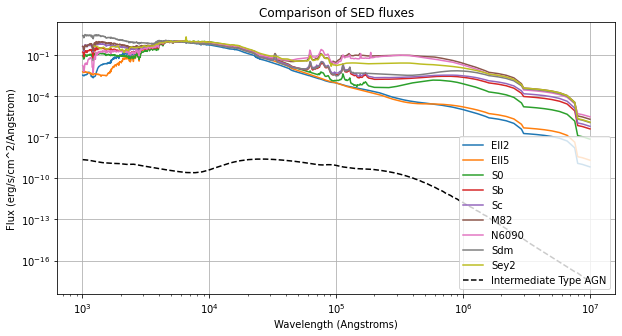

In [92]:
# Use this as a comparison, but in actuality each AGN model will be adjusted to the specific galaxy template
wl_agn = intermediateagn_models[0]['lambda (Angstroms)']
fl_agn = intermediateagn_models[0]['Total Flux (erg/s/cm^2/Angstrom)']


plt.figure(figsize=(10, 5))
for i, template in enumerate(swire_templates):
    wl = template['lambda (Angstroms)']
    fl = template['Total Flux (erg/s/cm^2/Angstrom)']
    plt.loglog(wl, fl, label=objname_list[i])
plt.loglog(wl_agn, fl_agn, label='Intermediate Type AGN', color='black', linestyle='--')
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (erg/s/cm^2/Angstrom)')
plt.title('Comparison of SED fluxes')
plt.grid()
plt.legend()
plt.show()

In [93]:
# Creating my full set of composites
# Now that we have a working composite set, we aim to do this for all templates, creating a list of composites, 
# with each of those composites also having values from 0 to 1 for alpha, defined earlier
spacing = 6
alpha = np.linspace(0, 1, spacing)
intermediatecomposites = []

# So for every swire template
for i, template in enumerate(swire_templates):
    print(f'Creating composite for {objname_list[i]}')
    agn_model = intermediateagn_models[i]
    intermediatecomposite_list = []
    for a in alpha:
        composite_galaxy = create_gal_agn_composite_sed(agn_model, template, a, 1)
        intermediatecomposite_list.append(composite_galaxy)
    intermediatecomposites.append(intermediatecomposite_list)

Creating composite for Ell2
Creating composite for Ell5
Creating composite for S0
Creating composite for Sb
Creating composite for Sc
Creating composite for M82
Creating composite for N6090
Creating composite for Sdm
Creating composite for Sey2


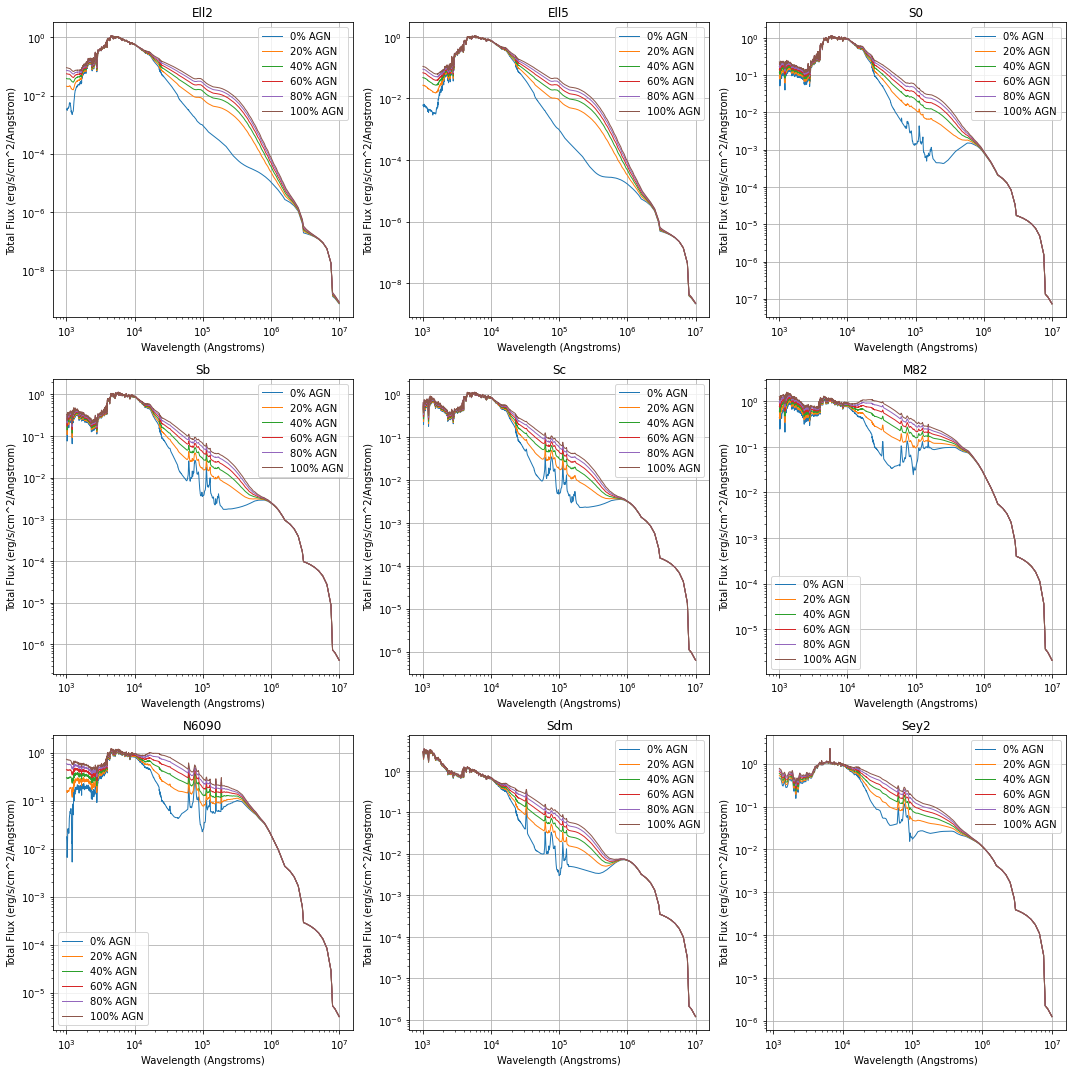

In [94]:
# Now we have our new set of composites we can plot these to see how they look
# Plotting the composite SEDs
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i+1)
    for j, comp in enumerate(intermediatecomposites[i]):
        wl_comp = comp['lambda (Angstroms)']
        fl_comp = comp['Total Flux (erg/s/cm^2/Angstrom)']
        plt.loglog(wl_comp, fl_comp, linewidth=1, linestyle='-', label=f'{round(alpha[j]*100)}% AGN')
    plt.legend()
    plt.title(objname_list[i])
    plt.xlabel('Wavelength (Angstroms)')
    plt.ylabel('Total Flux (erg/s/cm^2/Angstrom)')
    plt.grid()
    
plt.tight_layout()

# Save to outputs folder
plt.savefig('outputs/IntermediateAGNComposites.png', bbox_inches='tight', pad_inches=0.1, facecolor='white')

plt.show()


## Exploring UVJ Colour Space with Composites SEDs

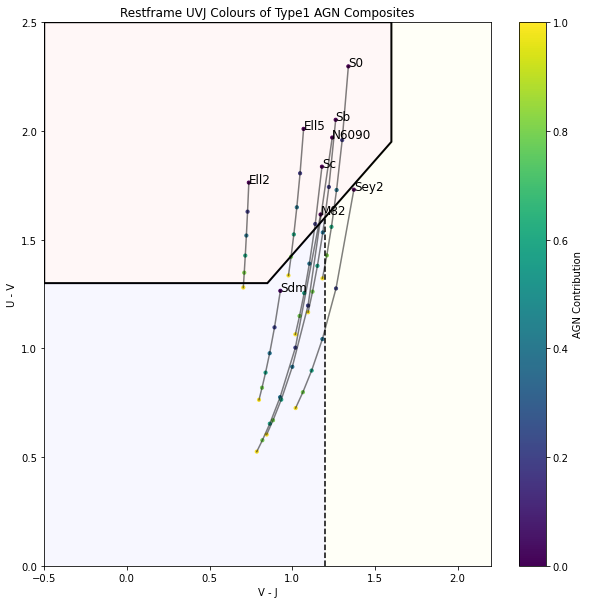

In [41]:
# Now we have our three sets of composites, what we need to do is to plot these on a UVJ diagram to see how they compare
# To do this well we need to convert all of our SEDs to photometry using our filter sets.

# First let's see how the UVJ diagram changes under the influence of the Type1 Contamination
# We can do this by plotting the UVJ diagram for the type 1 composites

# Calculate the UVJ colours for each composite
uv_list = []
vj_list = []

        
# For each Type1 Composite, of verying values calculate the UVJ colours

# First index is the galaxy base, second index is the alpha value
type1composites[7][5] # <- i.e the 8th galaxy, with 6th alpha value (Sdm +  100% AGN)

# For each composite, calculate the UVJ colours for each alpha value

# for i in range(9):
#     uv_list = []
#     vj_list = []
#     for j in range(6):
#         wl = type1composites[i][j].iloc[:, 0].values
#         fl = type1composites[i][j].iloc[:, 1].values
#         sed = astSED.SED(wavelength=wl, flux=fl) # z = 0.0 as these are restframe SEDs
#         uv = astSED.SED.calcColour(sed, pb_U, pb_V, magType='AB')
#         vj = astSED.SED.calcColour(sed, pb_V, pb_J, magType='AB')
#         uv_list.append(uv)
#         vj_list.append(vj)
#     uv_colours = uv_list
#     vj_colours = vj_list
#     col = 'r'
#     plt.figure(figsize=(10, 10))
#     #plt.scatter(vj_colours, uv_colours, c=alpha, s=10, label="")
#     # Plotting the colours, with the alpha values as the colour
#     plt.scatter(vj_colours, uv_colours, c=alpha, s=10, label="")
    
#     # Add text to the first galaxy with no contribution of AGN, showing which SWIRE template is being used
#     plt.text(vj_colours[0], uv_colours[0], objname_list[i], fontsize=12)
    
#     plt.ylabel('U - V')
#     plt.xlabel('V - J')
#     plt.title("Restframe UVJ Colours")
#     plt.xlim([-0.5, 2.2])
#     plt.ylim([0, 2.5])
#     plt.colorbar().set_label('AGN Contribution')
# plt.show()

# Setup a basic general composite list 

composites = type1composites
agn_type = 'Type1'

# Similar to before but plotting all of the composites on the same graph
uv_list = []
vj_list = []

# For each composite, calculate the UVJ colours for each alpha value
plt.figure(figsize=(10, 10))
for i in range(9):
    uv_list = []
    vj_list = []
    for j in range(6):
        wl = composites[i][j].iloc[:, 0].values
        fl = composites[i][j].iloc[:, 1].values
        sed = astSED.SED(wavelength=wl, flux=fl) # z = 0.0 as these are restframe SEDs
        uv = astSED.SED.calcColour(sed, pb_U, pb_V, magType='AB')
        vj = astSED.SED.calcColour(sed, pb_V, pb_J, magType='AB')
        uv_list.append(uv)
        vj_list.append(vj)
    uv_colours = uv_list
    vj_colours = vj_list
    col = 'r'
    #plt.scatter(vj_colours, uv_colours, c=alpha, s=10, label="")
    # Plotting the colours, with the alpha values as the colour
    plt.scatter(vj_colours, uv_colours, c=alpha, s=10, label="")
    
    # Add a faint line to show the path of the composites
    plt.plot(vj_colours, uv_colours, alpha=0.5, color='black')
    
    # Add text to the first galaxy with no contribution of AGN, showing which SWIRE template is being used
    plt.text(vj_colours[0], uv_colours[0], objname_list[i], fontsize=12)
    
plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Restframe UVJ Colours of "+ agn_type + " AGN Composites")
plt.xlim([-0.5, 2.2])
plt.ylim([0, 2.5])
plt.colorbar().set_label('AGN Contribution')
    
    # Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)

# Save to outputs folder
plt.savefig('outputs/'+agn_type+'AGNUVJ.png', bbox_inches='tight', pad_inches=0.1, facecolor='white')

plt.show()



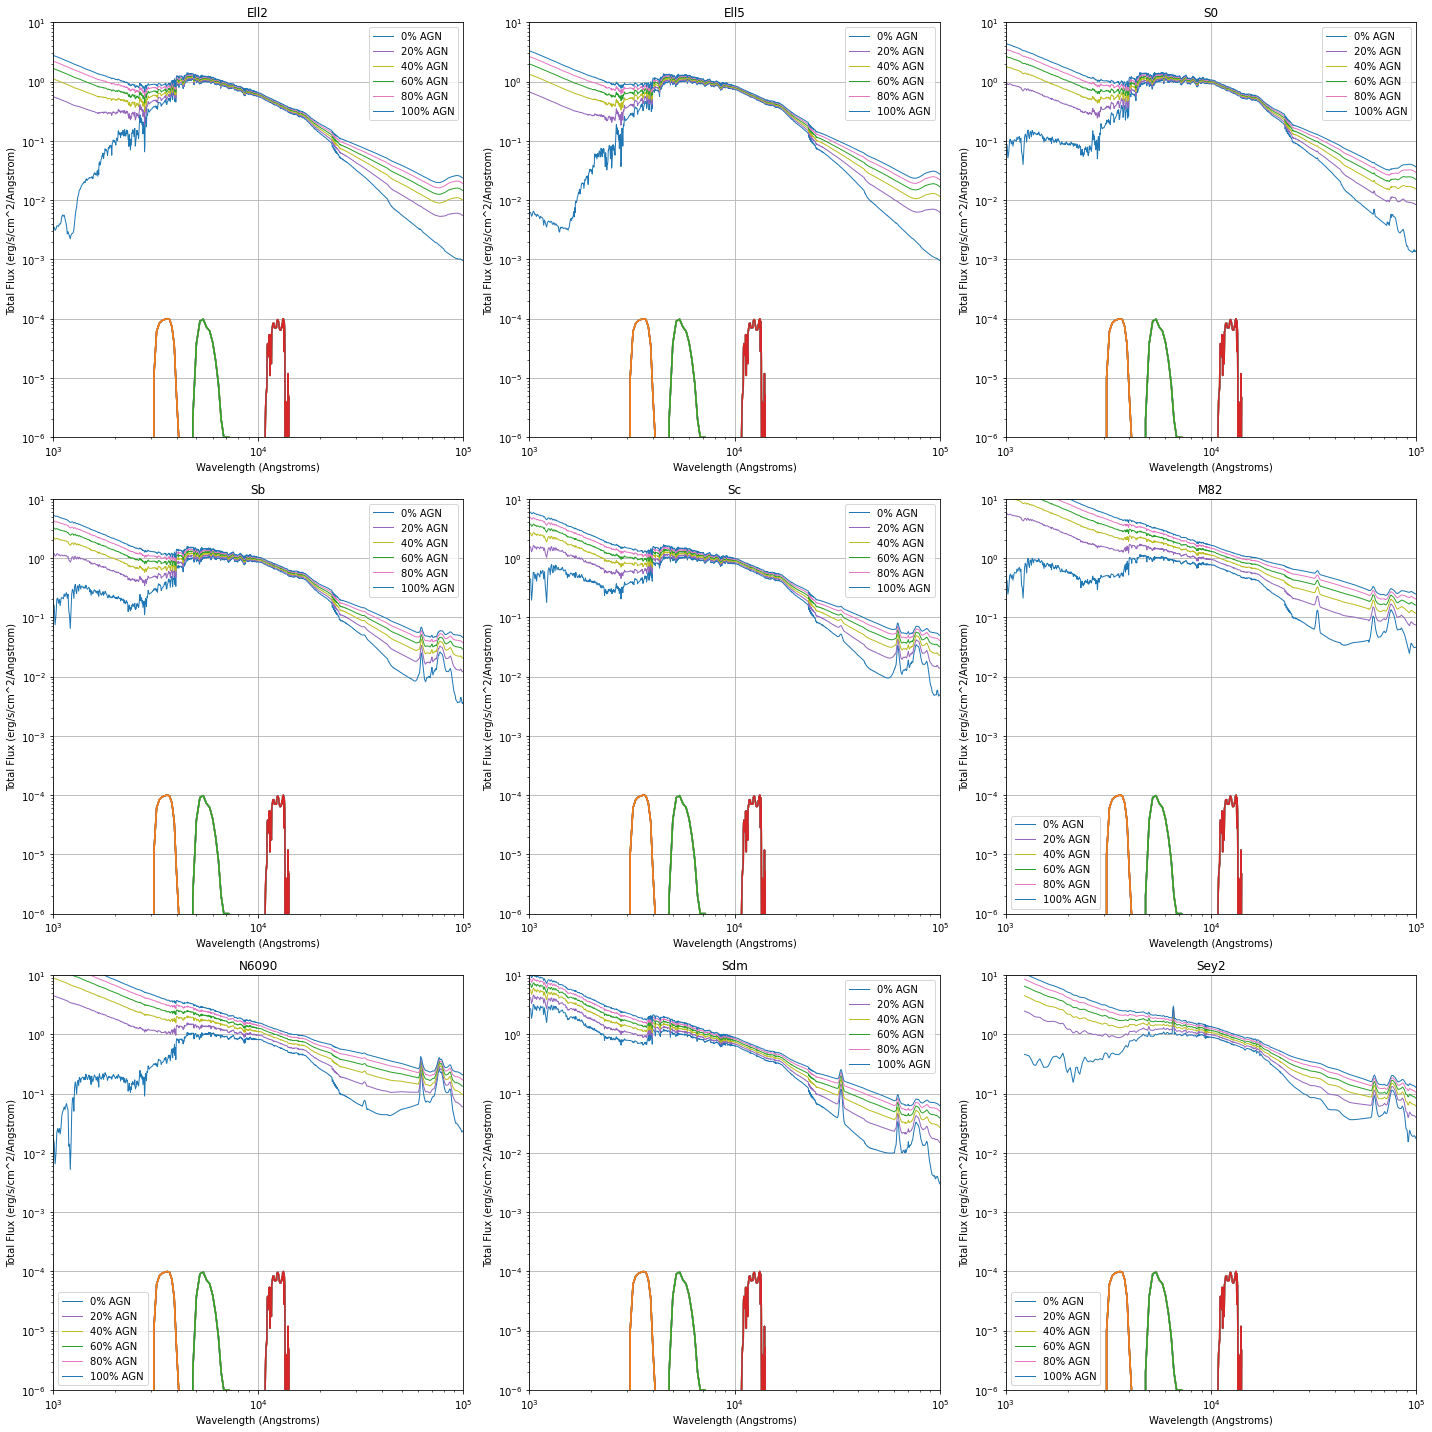

In [42]:
# To ensure that we are not missing something we will plot the filters on the wavelength range of the SEDs, while not to scale on the flux 
# they will be plotted and sclaed to the bottom of the plot to show where the filters are in relation to the SEDs
# and thus where the photometry is being calculated from

# Plotting the composite SEDs

# We can also plot the passbands for the UVJ
U_arr = np.array(pb_U.asList())
V_arr = np.array(pb_V.asList())
J_arr = np.array(pb_J.asList())

plt.figure(figsize=(20, 20))
sc = 1e-4
# Plot the SEDs
for i in range(9):
    plt.subplot(3, 3, i+1)
    for j, comp in enumerate(composites[i]):
        wl_comp = comp['lambda (Angstroms)']
        fl_comp = comp['Total Flux (erg/s/cm^2/Angstrom)']
        plt.loglog(wl_comp, fl_comp, linewidth=1, linestyle='-', label=f'{round(alpha[j]*100)}% AGN')
        plt.loglog(U_arr[:, 0], sc*U_arr[:,1])
        plt.loglog(V_arr[:, 0], sc*V_arr[:,1])
        plt.loglog(J_arr[:, 0], sc*J_arr[:,1])
    plt.legend()
    plt.title(objname_list[i])
    plt.xlabel('Wavelength (Angstroms)')
    plt.ylabel('Total Flux (erg/s/cm^2/Angstrom)')
    plt.grid()
    plt.xlim([1e3, 1e5])
    plt.ylim([1e-6, 1e1])



# plt.loglog(U_arr[:, 0], U_arr[:,1], label='U')
# plt.loglog(V_arr[:, 0], V_arr[:,1], label='V')
# plt.loglog(J_arr[:, 0], J_arr[:,1], label='J')
# plt.title("Passbands for the UVJ Filters")
# plt.xlabel('Wavelength (Angstroms)')
# plt.ylabel('Transmission')

# Set some limits


plt.tight_layout()

plt.savefig('outputs/'+agn_type+'AGNSEDsWithUVJFilters.png', bbox_inches='tight', pad_inches=0.1, facecolor='white')

plt.show()





In [89]:
# Generalise the above code to iterate through the inclination angles
# Define the particular AGN Model we are exploring
# # 1. Intermediate AGN

comp_inc_list = []
tau_val = 2
for n in range(len(SKIRTOR_PARAMS['i'])):
    print("Creating Composites for i = ", SKIRTOR_PARAMS['i'][n])
    tau = SKIRTOR_PARAMS['tau'][tau_val]
    p = SKIRTOR_PARAMS['p'][1] # Can make this either 0.5 or 0
    q = SKIRTOR_PARAMS['q'][0] # Make this zero, similar to the Ciesla paper
    oa = SKIRTOR_PARAMS['oa'][4]
    rr = SKIRTOR_PARAMS['rr'][1]
    i = SKIRTOR_PARAMS['i'][n]


    # This is again, a new model
    agn_model = read_skirtor_model(skirtor_folderpath, tau, p, q, oa, rr, i)

    # Print the parameters used in the AGN model
    print(f'Tau: {tau}, p: {p}, q: {q}, oa: {oa}, rr: {rr}, i: {i}')

    # 2. Swire Templates
    swire_templates = []
    objname_list = []

    # In this template set we have 3 ellipticals, 4 spirals, 2 star bursts, and a Seyfert 2 galaxy (which inherently has AGN contributions)
    template_names = ['Ell2', 'Ell5', 'S0', 'Sb', 'Sc', 'M82', 'N6090', 'Sdm', 'Sey2']
    for name in template_names:
        
        template, obj_name = read_swire_template(swire_folderpath, name)
        swire_templates.append(template)
        objname_list.append(obj_name)

    # Make sure AGN are correctly scaled against the galaxy range   
    # Have an original AGN model to adjust against 
    intermediatet_agn = agn_model.copy()

    intermediateagn_models = []

    # When adjusting, we need to make sure we interpolate the data correctly at each point, 
    # so for a specific AGN model this needs to be interpolated correctly against the relevant galaxy template
    # essentially each AGN model will be specifically cut for it's template.
    for i, template in enumerate(swire_templates):
        swire_templates[i], agn_model = adjust_wavelength_range(template, agn_model)   
        intermediateagn_models.append(agn_model)
        agn_model = intermediatet_agn.copy()
    
    
    spacing = 13
    alpha = np.linspace(0, 1, spacing)
    intermediatecomposites = []

    # So for every swire template
    for i, template in enumerate(swire_templates):
        print(f'Creating composite for {objname_list[i]}')
        agn_model = intermediateagn_models[i]
        intermediatecomposite_list = []
        for a in alpha:
            composite_galaxy = create_gal_agn_composite_sed(agn_model, template, a, 1)
            intermediatecomposite_list.append(composite_galaxy)
        intermediatecomposites.append(intermediatecomposite_list)
    
        
    comp_inc_list.append(intermediatecomposites)
    


Creating Composites for i =  0
Tau: 7, p: 0.5, q: 0, oa: 50, rr: 20, i: 0
Creating composite for Ell2
Creating composite for Ell5
Creating composite for S0
Creating composite for Sb
Creating composite for Sc
Creating composite for M82
Creating composite for N6090
Creating composite for Sdm
Creating composite for Sey2
Creating Composites for i =  10
Tau: 7, p: 0.5, q: 0, oa: 50, rr: 20, i: 10
Creating composite for Ell2
Creating composite for Ell5
Creating composite for S0
Creating composite for Sb
Creating composite for Sc
Creating composite for M82
Creating composite for N6090
Creating composite for Sdm
Creating composite for Sey2
Creating Composites for i =  20
Tau: 7, p: 0.5, q: 0, oa: 50, rr: 20, i: 20
Creating composite for Ell2
Creating composite for Ell5
Creating composite for S0
Creating composite for Sb
Creating composite for Sc
Creating composite for M82
Creating composite for N6090
Creating composite for Sdm
Creating composite for Sey2
Creating Composites for i =  30
Tau: 7,

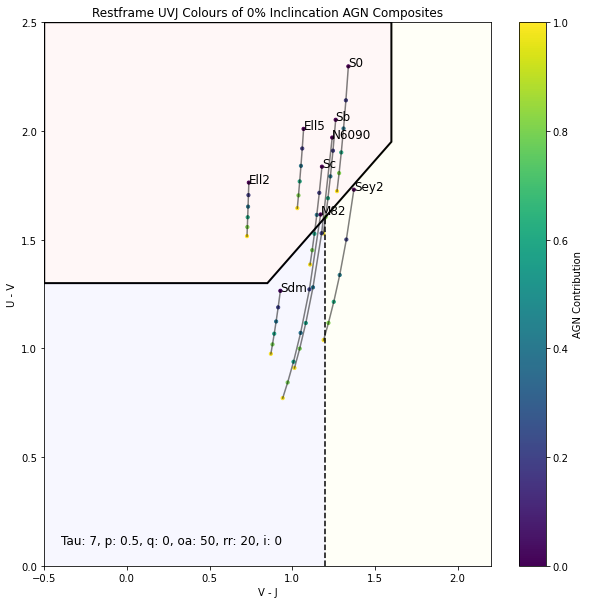

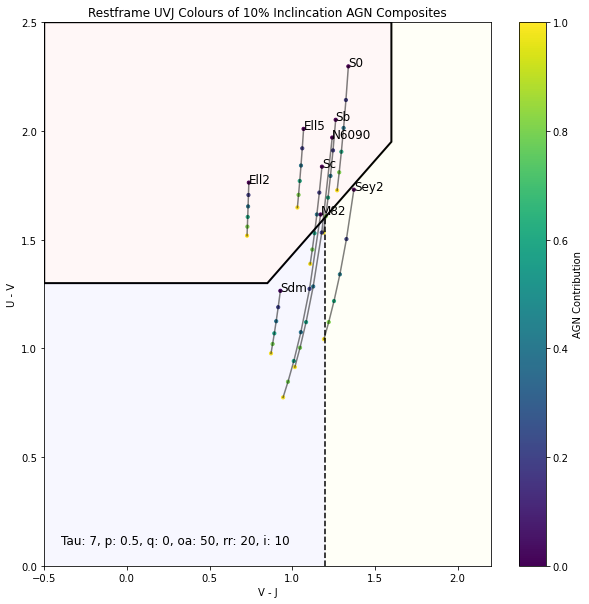

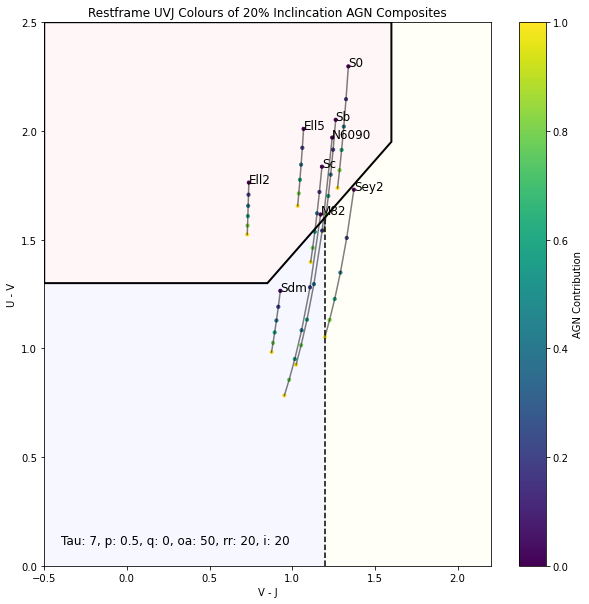

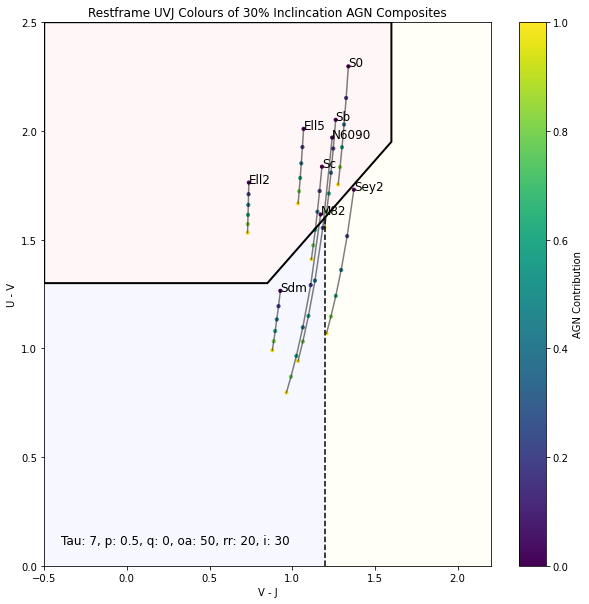

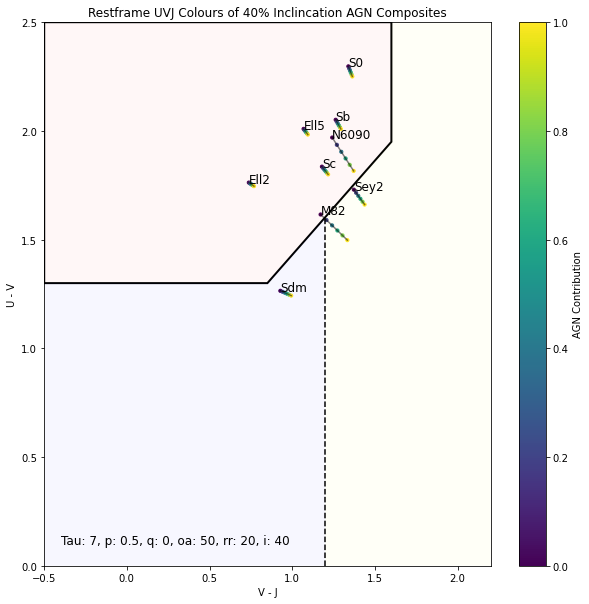

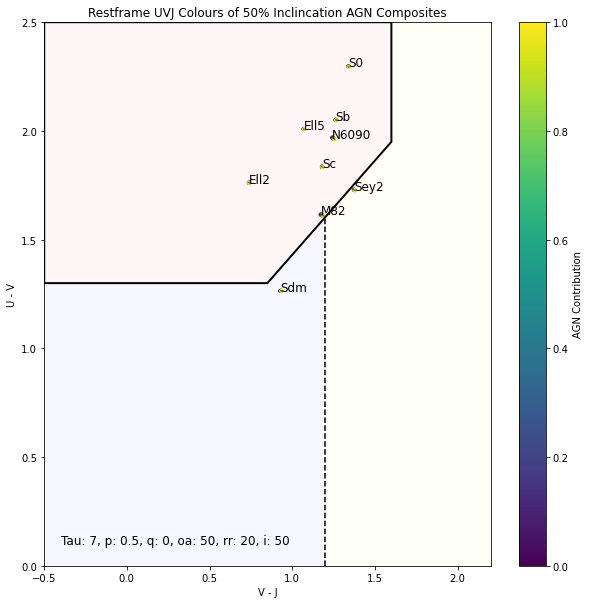

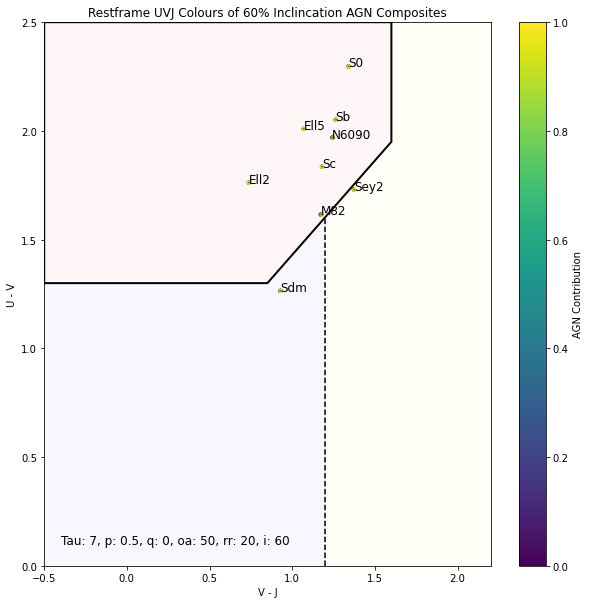

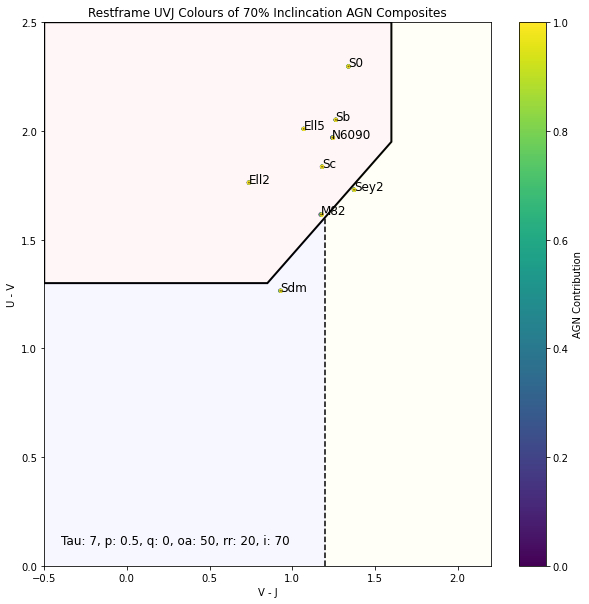

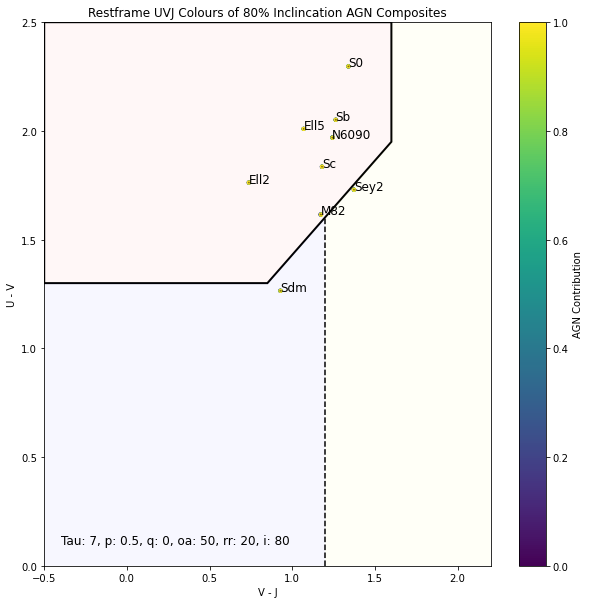

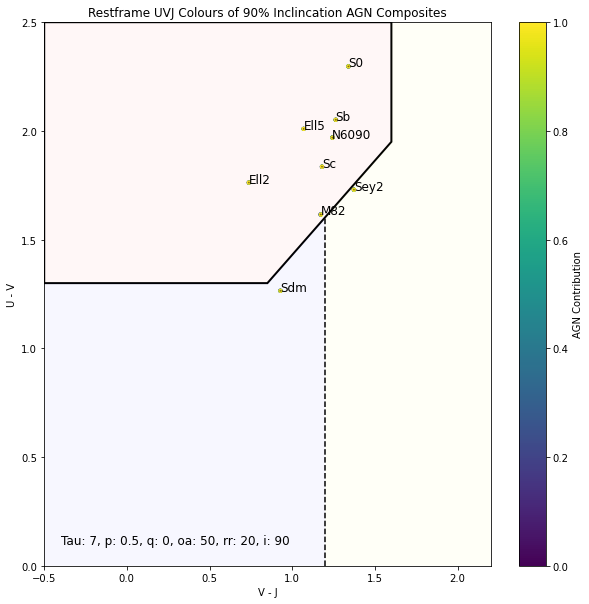

In [96]:
# Now we have our full set of composites for all of the inclinations, we can plot these to see how they look
# Skipping the SED step, we convert to UVJ colours and plot a UVJ diagram for each of the inclinations
# Setup a basic general composite list

# each of our comp_inc_list contains a list of AGN models for each galaxy, and each of these AGN models has been combined with the galaxy template 
# using a range of alpha values


# Similar to before but plotting all of the composites on the same graph
# As we are plotting this for each inclination loop over the inclinations

# For each inclination

for n in range(len(SKIRTOR_PARAMS['i'])):
    # For each composite, calculate the UVJ colours for each alpha value
    plt.figure(figsize=(10, 10))

    for i in range(len(objname_list)):
        uv_list = []
        vj_list = []
        for j in range(len(alpha)):
            wl = comp_inc_list[n][i][j].iloc[:, 0].values
            fl = comp_inc_list[n][i][j].iloc[:, 1].values
            sed = astSED.SED(wavelength=wl, flux=fl) # z = 0.0 as these are restframe SEDs
            uv = astSED.SED.calcColour(sed, pb_U, pb_V, magType='AB')
            vj = astSED.SED.calcColour(sed, pb_V, pb_J, magType='AB')
            uv_list.append(uv)
            vj_list.append(vj)
        uv_colours = uv_list
        vj_colours = vj_list
        col = 'r'
        #plt.scatter(vj_colours, uv_colours, c=alpha, s=10, label="")
        # Plotting the colours, with the alpha values as the colour
        plt.scatter(vj_colours, uv_colours, c=alpha, s=10, label="")
        
        # Add a faint line to show the path of the composites
        plt.plot(vj_colours, uv_colours, alpha=0.5, color='black')
        
        # Add text to the first galaxy with no contribution of AGN, showing which SWIRE template is being used
        plt.text(vj_colours[0], uv_colours[0], objname_list[i], fontsize=12)
        
    plt.ylabel('U - V')
    plt.xlabel('V - J')
    plt.title("Restframe UVJ Colours of "+ str(SKIRTOR_PARAMS['i'][n]) + "% Inclincation AGN Composites")
    plt.xlim([-0.5, 2.2])
    plt.ylim([0, 2.5])
    plt.colorbar().set_label('AGN Contribution')
        
        # Define paths for selections
    path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
    path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
    path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

    # Add patches for selections
    plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
    plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
    plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

    # Add vertical line
    plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)
    
    # Add a textbox with the model params
    plt.text(-0.4, 0.1, f'Tau: {tau}, p: {p}, q: {q}, oa: {oa}, rr: {rr}, i: {SKIRTOR_PARAMS["i"][n]}', fontsize=12)

    # Save to outputs folder
    plt.savefig('outputs/UVJPlots/Composite'+str(SKIRTOR_PARAMS['i'][n]) +'i_'+str(SKIRTOR_PARAMS['tau'][tau_val])+'tau_AGNUVJ.png', bbox_inches='tight', pad_inches=0.1, facecolor='white')

    plt.show()
    


In [46]:
# # Generalise this idea further so I can print out the UVJ diagrams for all of the AGN types
# # We would like to have a particular AGN, with parameters, and go through the entire parameter space, creating UVJ diagrams for each of the AGN types
# # that a composite has been created for


### Do not run this, this will create all of the composites but will take a long time to run
### and may not be necessary for the final report
### This will however create composites for everything in the parameter space


# comp_inc_list = []
# comp_tau_list = []
# comp_open_angle_list = []
# comp_p_list = []   
# comp_q_list = []
# comp_rr_list = []

# for n in range(len(SKIRTOR_PARAMS['i'])):
#     print("Creating Composites for i = ", SKIRTOR_PARAMS['i'][n])
    
#     for m in range(len(SKIRTOR_PARAMS['tau'])):
        
#         print("Creating Composites for tau = ", SKIRTOR_PARAMS['tau'][m])
        
#         for o in range(len(SKIRTOR_PARAMS['oa'])):
            
#             print("Creating Composites for oa = ", SKIRTOR_PARAMS['oa'][o])
            
#             for p_val in range(len(SKIRTOR_PARAMS['p'])):
                
#                 print("Creating Composites for p = ", SKIRTOR_PARAMS['p'][p_val])
                
#                 for q_val in range(len(SKIRTOR_PARAMS['q'])):
                    
#                     print("Creating Composites for q = ", SKIRTOR_PARAMS['q'][q_val])
                    
#                     for rr in range(len(SKIRTOR_PARAMS['rr'])):
                        
#                         print("Creating Composites for rr = ", SKIRTOR_PARAMS['rr'][rr])
        
#                         tau = SKIRTOR_PARAMS['tau'][m]
#                         p = SKIRTOR_PARAMS['p'][p_val]
#                         q = SKIRTOR_PARAMS['q'][q_val]
#                         oa = SKIRTOR_PARAMS['oa'][o]
#                         rr = SKIRTOR_PARAMS['rr'][rr]
#                         i = SKIRTOR_PARAMS['i'][n]


#                         # This is again, a new model
#                         agn_model = read_skirtor_model(skirtor_folderpath, tau, p, q, oa, rr, i)

#                         # Print the parameters used in the AGN model
#                         print(f'Tau: {tau}, p: {p}, q: {q}, oa: {oa}, rr: {rr}, i: {i}')

#                         # 2. Swire Templates
#                         swire_templates = []
#                         objname_list = []

#                         # In this template set we have 3 ellipticals, 4 spirals, 2 star bursts, and a Seyfert 2 galaxy (which inherently has AGN contributions)
#                         template_names = ['Ell2', 'Ell5', 'S0', 'Sb', 'Sc', 'M82', 'N6090', 'Sdm', 'Sey2']
#                         for name in template_names:
                            
#                             template, obj_name = read_swire_template(swire_folderpath, name)
#                             swire_templates.append(template)
#                             objname_list.append(obj_name)

#                         # Make sure AGN are correctly scaled against the galaxy range   
#                         # Have an original AGN model to adjust against 
#                         intermediatet_agn = agn_model.copy()

#                         intermediateagn_models = []

#                         # When adjusting, we need to make sure we interpolate the data correctly at each point, 
#                         # so for a specific AGN model this needs to be interpolated correctly against the relevant galaxy template
#                         # essentially each AGN model will be specifically cut for it's template.
#                         for i, template in enumerate(swire_templates):
#                             swire_templates[i], agn_model = adjust_wavelength_range(template, agn_model)   
#                             intermediateagn_models.append(agn_model)
#                             agn_model = intermediatet_agn.copy()
                        
                        
#                         spacing = 6
#                         alpha = np.linspace(0, 1, spacing)
#                         intermediatecomposites = []

#                         # So for every swire template
#                         for i, template in enumerate(swire_templates):
#                             print(f'Creating composite for {objname_list[i]}')
#                             agn_model = intermediateagn_models[i]
#                             intermediatecomposite_list = []
#                             for a in alpha:
#                                 composite_galaxy = create_gal_agn_composite_sed(agn_model, template, a, 1)
#                                 intermediatecomposite_list.append(composite_galaxy)
#                             intermediatecomposites.append(intermediatecomposite_list)
                        
                            
#                         comp_inc_list.append(intermediatecomposites)
#                     comp_tau_list.append(tau)
#                 comp_open_angle_list.append(oa)
#             comp_p_list.append(p_val)
#         comp_q_list.append(q_val)
#     comp_rr_list.append(rr)
            
                    
            





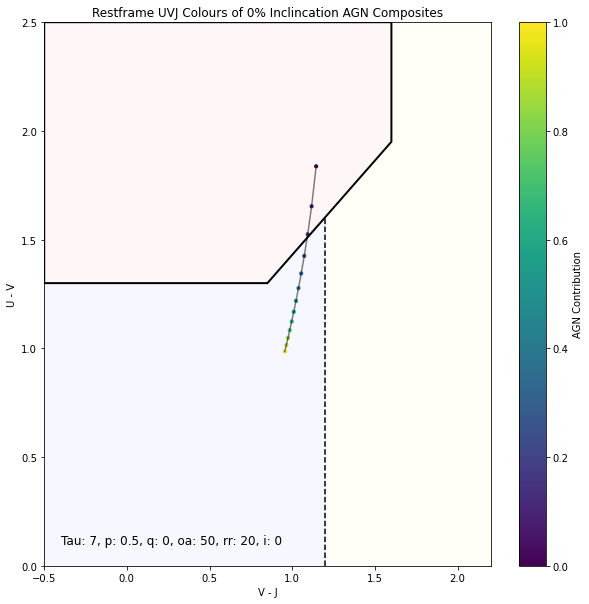

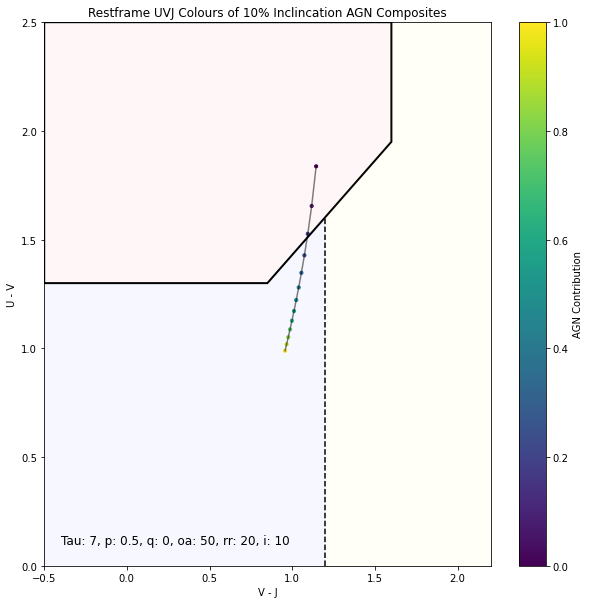

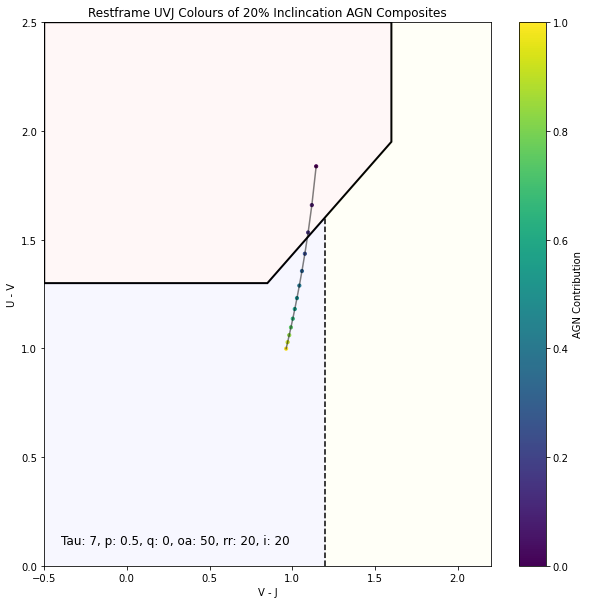

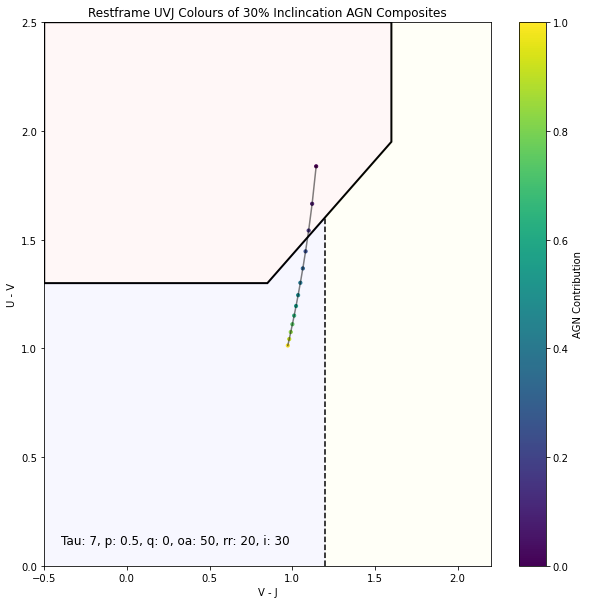

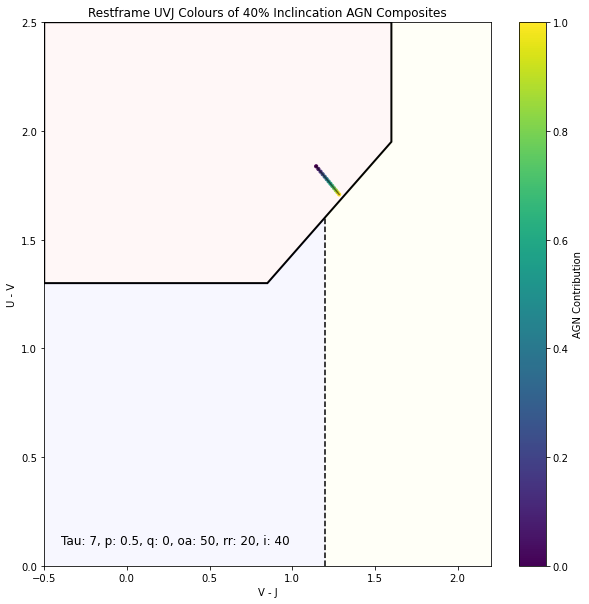

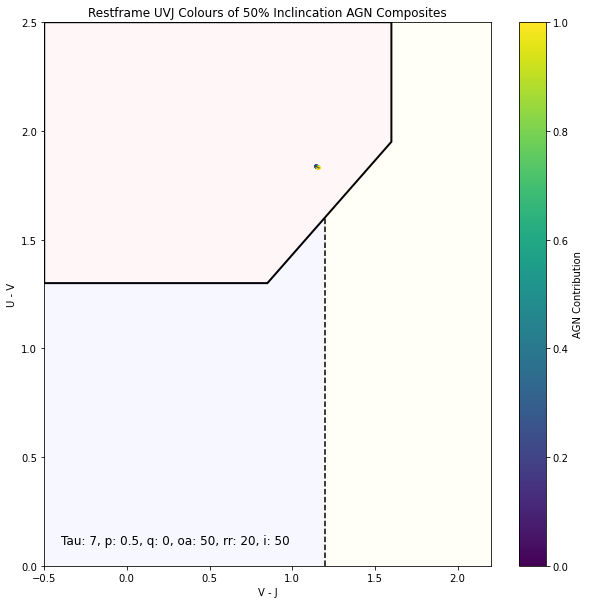

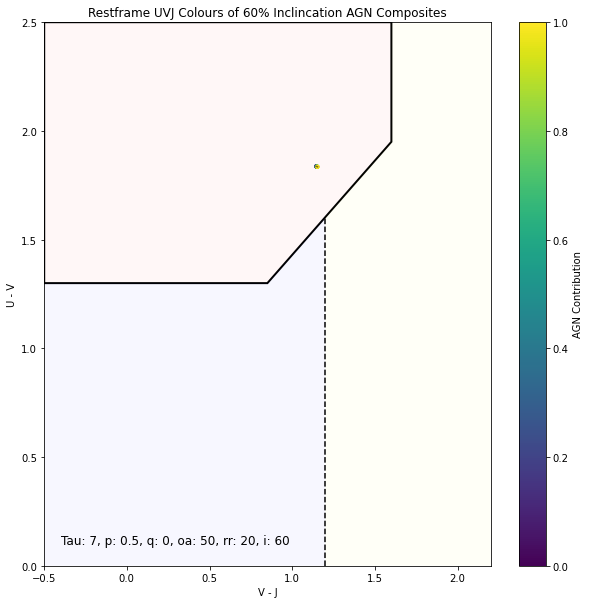

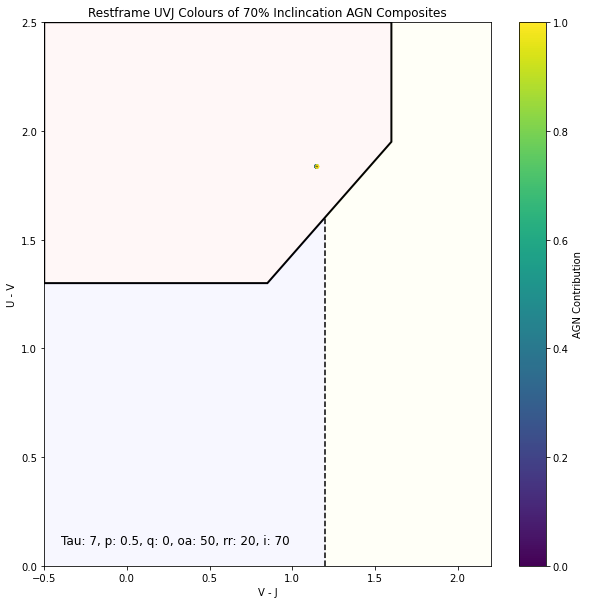

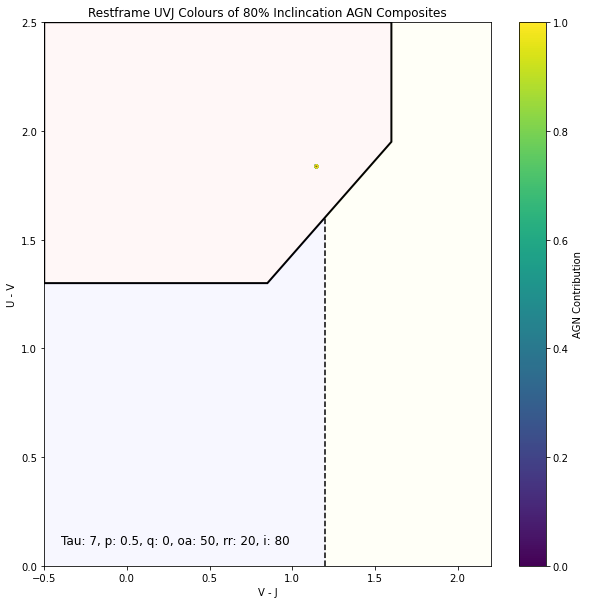

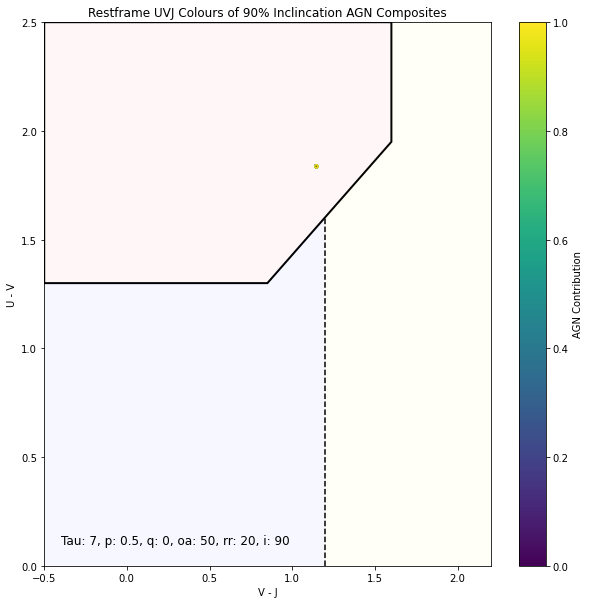

In [104]:
# We would also like to create a mean position of each of the composites, i.e for all galaxies at a particular alpha value.
# Get their position, and generate a mean position. We can then create a new UVJ plot, and plot the mean positions with a line
# To see how each of these galaxies move through the UVJ colour space.

# To do this we need to explore the UVJ colours of each of the composites, and then calculate the mean position of each of the composites
# We can then plot this mean position on the UVJ diagram to see how the composites move through the UVJ space

# We can do this by plotting the UVJ diagram for the type 1 composites

# We also go back to only considering the type 1, intermediate, and type 2 AGN


alpha = np.linspace(0, 1, 13)
for n in range(len(SKIRTOR_PARAMS['i'])):
    # For each composite, calculate the UVJ colours for each alpha value
    plt.figure(figsize=(10, 10))

    # For each inclination we would like to look at the alpha value, 
    # For each alpha value, check each galaxy, and calculate the UVJ colours
    # get a mean value of the UVJ colours for each alpha value, and plot it
    # then move to the next alpha value
    
    uv_mean = []
    vj_mean = []
    
    type1agn_uv = []
    type1agn_vj = []
    for j in range(len(alpha)):
        # Calculate the UVJ colours for all of the composites and then average the position
        uv_list = []
        vj_list = []
        for i in range(len(objname_list)):
            wl = comp_inc_list[n][i][j].iloc[:, 0].values
            fl = comp_inc_list[n][i][j].iloc[:, 1].values
            sed = astSED.SED(wavelength=wl, flux=fl)
            uv = astSED.SED.calcColour(sed, pb_U, pb_V, magType='AB')
            vj = astSED.SED.calcColour(sed, pb_V, pb_J, magType='AB')
            uv_list.append(uv)
            vj_list.append(vj)
        uv_colours = uv_list
        vj_colours = vj_list
        uv_mean.append(np.mean(uv_colours))
        vj_mean.append(np.mean(vj_colours))
        
        # Save these for plotting later
        if(j == 0):
            type1agn_uv.append(uv_colours)
            type1agn_vj.append(vj_colours)
        
    plt.scatter(vj_mean, uv_mean, c=alpha, s=10, label="")
        
    # add the connecting line
    plt.plot(vj_mean, uv_mean, alpha=0.5, color='black')
             
    plt.ylabel('U - V')
    plt.xlabel('V - J')
    plt.title("Restframe UVJ Colours of "+ str(SKIRTOR_PARAMS['i'][n]) + "% Inclincation AGN Composites")
    plt.xlim([-0.5, 2.2])
    plt.ylim([0, 2.5])
    plt.colorbar().set_label('AGN Contribution')
        
        # Define paths for selections
    path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
    path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
    path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

    # Add patches for selections
    plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
    plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
    plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

    # Add vertical line
    plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)
    
    # Add a textbox with the model params
    plt.text(-0.4, 0.1, f'Tau: {tau}, p: {p}, q: {q}, oa: {oa}, rr: {rr}, i: {SKIRTOR_PARAMS["i"][n]}', fontsize=12)

    # Save to outputs folder
    plt.savefig('outputs/UVJPlots/meanposition_composite2'+str(SKIRTOR_PARAMS['i'][n]) +'AGNUVJ.png', bbox_inches='tight', pad_inches=0.1, facecolor='white')

    plt.show()


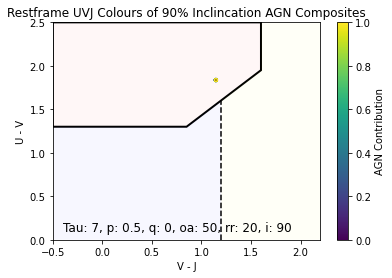

In [105]:
# We can create one final set of plots which simply plot the UVJ diagram for each of the AGN types, and then plot the mean position of each of the composites
# So we can see the two together


plt.scatter(vj_mean, uv_mean, c=alpha, s=10, label="")
        
        # add the connecting line
plt.plot(vj_mean, uv_mean, alpha=0.5, color='black')
             
plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Restframe UVJ Colours of "+ str(SKIRTOR_PARAMS['i'][n]) + "% Inclincation AGN Composites")
plt.xlim([-0.5, 2.2])
plt.ylim([0, 2.5])
plt.colorbar().set_label('AGN Contribution')
        
        # Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

    # Add patches for selections
plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

    # Add vertical line
plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)
    
    # Add a textbox with the model params
plt.text(-0.4, 0.1, f'Tau: {tau}, p: {p}, q: {q}, oa: {oa}, rr: {rr}, i: {SKIRTOR_PARAMS["i"][n]}', fontsize=12)

    # Save to outputs folder
    #plt.savefig('outputs/UVJPlots/meanposition_composite2'+str(SKIRTOR_PARAMS['i'][n]) +'AGNUVJ.png', bbox_inches='tight', pad_inches=0.1, facecolor='white')

plt.show()